<a href="https://colab.research.google.com/github/leshless/study/blob/main/python_calculus/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Занятие 6
## Математический анализ
## Дифференцирование

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
from IPython.display import display, Latex
%matplotlib inline

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду.
$$
y = x^2e^{-x}
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

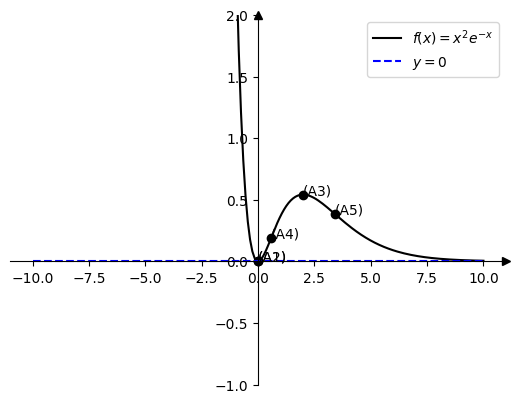

In [ ]:
def f_np(x):
  return x**2 * np.exp(-x)

def f(x):
  return x**2 * sympy.exp(-x)

ax = plt.gca()
ax.set(ylim=[-1, 2])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = sympy.symbols("x")
D = continuous_domain(f(x), x, S.Reals)
display(Latex(f"ООФ: {latex(D)}"))

x_0 = solve(f(x), x)
display(Latex(f"Корни\;f(x): {latex(x_0)}"))

df = simplify(f(x).diff(x))

dx_0 = solve(df, x)
display(Latex(f"Точки\;экстремума\;f(x): {latex(dx_0)}"))

df2 = simplify(df.diff(x))

dx2_0 = solve(df2, x)
display(Latex(f"Точки\;перегиба\;f(x): {latex(dx2_0)}"))

h_as = f(x).limit(x, sympy.oo)
display(Latex(f"Гор.\;асимтотa\;f(x): y={latex(h_as)}"))

X = np.linspace(-10, 10, 200)
Y = f_np(X)
ax.plot(X, Y, "k-", label=f"$f(x)={latex(f(x))}$")

X0 = np.array([float(x) for x in x_0] + [float(x) for x in dx_0] + [float(x) for x in dx2_0])
Y0 = f_np(X0)
ax.scatter(X0, Y0, c="k")
for i in range(len(X0)):
 ax.annotate(f"(A{i+1})", xy=(X0[i], Y0[i]))

ax.hlines(h_as, -10, 10, colors="b", linestyles="--", label=f"$y={h_as}$")

ax.legend(loc="best")

## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду.
$$
y=xe^{2/x} + 1
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

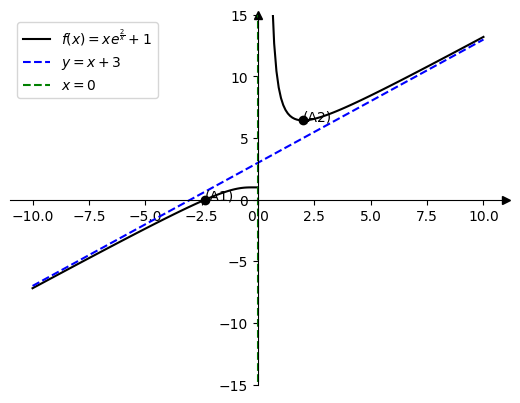

In [ ]:
def f_np(x):
  return x*np.exp(2/x) + 1

def f(x):
  return x*sympy.exp(2/x) + 1

ax = plt.gca()
ax.set(ylim=[-15, 15])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = sympy.symbols("x")
D = continuous_domain(f(x), x, S.Reals)
display(Latex(f"ООФ: {latex(D)}"))

x_0 = [nsolve(f(x), x, [-5, -0.001], solver='bisect')]
display(Latex(f"Корни\;f(x): {latex(x_0)}"))

df = simplify(f(x).diff(x))

dx_0 = solve(df, x)
display(Latex(f"Точки\;экстремума\;f(x): {latex(dx_0)}"))

df2 = simplify(df.diff(x))

dx2_0 = solve(df2, x)
display(Latex(f"Точки\;перегиба\;f(x): {latex(dx2_0)}"))

v_as = 0

k = sympy.limit(f(x)/x, x, sympy.oo)
b = sympy.limit(f(x) - k*x, x, sympy.oo)
def n_as(x):
  return k*x + b
display(Latex(f"Накл.\;асимптота\;f(x): y={latex(n_as(x))}"))

X1 = np.linspace(-10, -0.01, 100)
Y1 = f_np(X1)
ax.plot(X1, Y1, "k-", label=f"$f(x)={latex(f(x))}$")

X2 = np.linspace(0.01, 10, 100)
Y2 = f_np(X2)
ax.plot(X2, Y2, "k-")

X3 = np.linspace(-10, 10, 100)
Y3 = n_as(X3)
ax.plot(X3, Y3, "b--", label=f"$y={latex(n_as(x))}$")

ax.vlines(0.01, -50, 50, colors="g", linestyle="--", label=f"$x={latex(v_as)}$")

X0 = np.array([float(x) for x in x_0] + [float(x) for x in dx_0])
Y0 = f_np(X0)
ax.scatter(X0, Y0, c="k")
for i in range(len(X0)):
 ax.annotate(f"(A{i+1})", xy=(X0[i], Y0[i]))

ax.legend(loc="best")

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду.

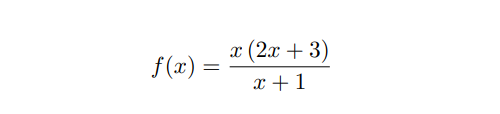

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

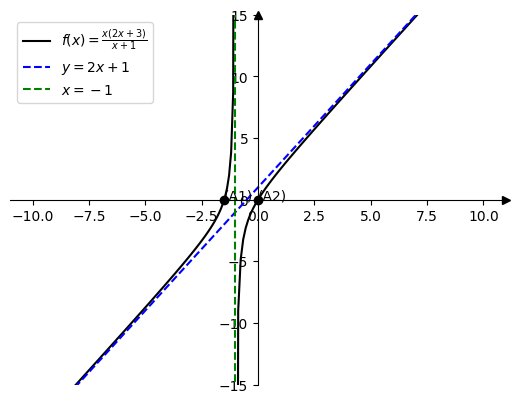

In [139]:
def f(x):
  return x*(2*x + 3) / (x + 1)

ax = plt.gca()
ax.set(ylim=[-15, 15])
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

x = sympy.symbols("x")
D = continuous_domain(f(x), x, S.Reals)
display(Latex(f"ООФ: {latex(D)}"))

x_0 = solve(f(x), x)
display(Latex(f"Корни\;f(x): {latex(x_0)}"))

df = simplify(f(x).diff(x))

dx_0 = list(solveset(df, x, domain=S.Reals))
display(Latex(f"Точки\;экстремума\;f(x): {latex(dx_0)}"))

df2 = simplify(df.diff(x))

dx2_0 = solve(df2, x)
display(Latex(f"Точки\;перегиба\;f(x): {latex(dx2_0)}"))

v_as = -1

k = sympy.limit(f(x)/x, x, sympy.oo)
b = sympy.limit(f(x) - k*x, x, sympy.oo)
def n_as(x):
  return k*x + b
display(Latex(f"Накл.\;асимптота\;f(x): {latex(n_as(x))}"))

X1 = np.linspace(-10, -1-0.01, 100)
Y1 = f(X1)
ax.plot(X1, Y1, "k-", label=f"$f(x)={latex(f(x))}$")

X2 = np.linspace(-1+0.01, 10, 100)
Y2 = f(X2)
ax.plot(X2, Y2, "k-")

X3 = np.linspace(-10, 10, 100)
Y3 = n_as(X3)
ax.plot(X3, Y3, "b--", label=f"$y={latex(n_as(x))}$")

ax.vlines(v_as, -50, 50, colors="g", linestyle="--", label=f"$x={latex(v_as)}$")

X0 = np.array([float(x) for x in x_0])
Y0 = f(X0)
ax.scatter(X0, Y0, c="k")
for i in range(len(X0)):
 ax.annotate(f"(A{i+1})", xy=(X0[i], Y0[i]))



ax.legend(loc="best")